## Explainable uplift modelling
### Introduction
Imagine you are a businessman running your own company - who wouldn't like to be?
Of course you want to maximize profits and cut down costs but often finding the tradeoff is not an easy task.
Here comes Machine Learning and uplift models that can help you in optimizing marketing costs.
You may ask yourself sometimes whether it makes sense to address marketing campaigns to all your customers. 
From one point of view by sending an offer you think the probability that the customer will buy your product is higher - in fact it is not always the cases 
(we will go back to the matter in a moment).
On the other hand, making large-scale campaign is costly. It would be good to know what is the return of investment. 

Much food for thought was presented, we will try in this chapter to clarify the topic.

First - is it true that by sending the marketing offer we only extend the chance for the customer to buy our product and therefore extend out profit?
The issue was already investigated [cite] and it was pointed out that customers of any company can be divided into 4 groups. [wkleić obrazek]
In the picture it can be seen that there is a clear division on a customers that received/didn't receive the treatment (in our case marketing materials) and the ones that later 
on bought/didn't buy the product. [tutaj opiszę w większych szczegółach cztery kategorie]

In [1]:
from data import X_train, Y_train, X_valid, Y_valid, treatment_col, column_names
from model import local_search_xgb, train_logistic, simple_network, evaluate_uplift, train_xgb_model
from explanations import shapley_diff

In [2]:
xgbmodel = local_search_xgb(X_train, Y_train, X_valid, Y_valid, treatment_col, just_get_model=True)
#xgbmodel = train_xgb_model(X_train, Y_train, X_valid, Y_valid)

train score = 0.03989780863901681
valid score = 0.04252811281452567


0.03989780863901681

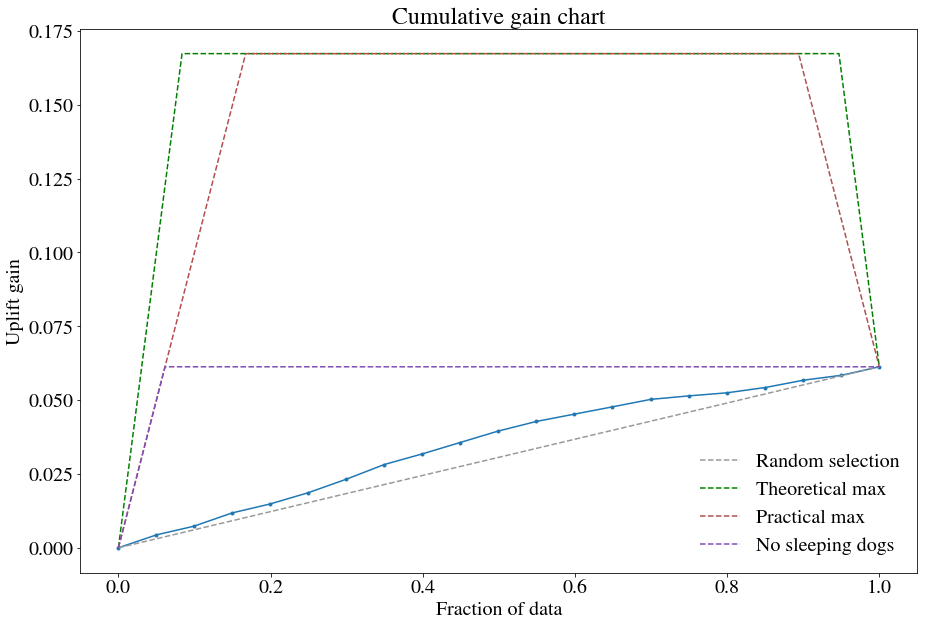

In [3]:
evaluate_uplift(xgbmodel, X_train, Y_train, treatment_col, plot=True)

0.04252811281452567

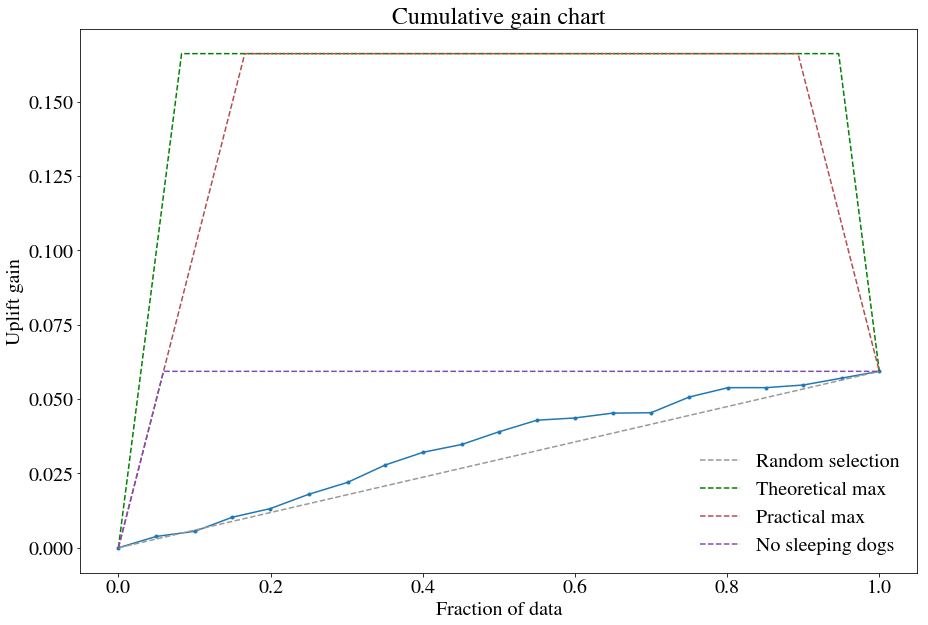

In [4]:
evaluate_uplift(xgbmodel, X_valid, Y_valid, treatment_col, plot=True)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


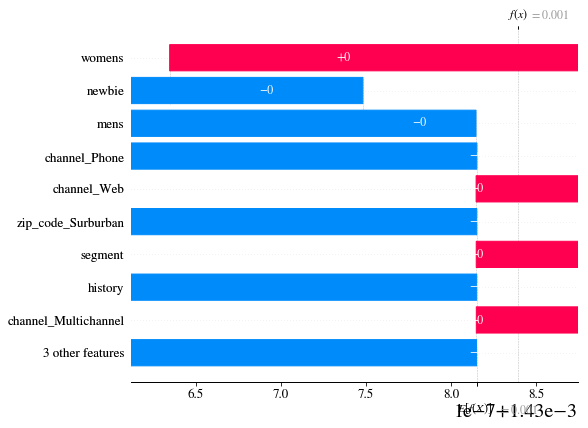

(array([ 0.00000000e+00, -2.58193222e-10, -6.64459377e-08,  2.04714569e-07,
        -3.82855090e-10, -1.57800652e-10,  0.00000000e+00, -1.13512516e-07,
        -4.90882322e-10,  4.25915071e-10,  2.12571451e-10,  3.13308720e-10]),
 0.0014308148622512173)

In [5]:
shapley_diff(xgbmodel, X_valid[2,:], X_valid, column_names, treatment_col)